# Day 4 – Convolutional Neural Networks & Prompt Engineering Essentials

This notebook is part of my long-term journey into AI and Machine Learning.

Today I will:
- Build a simple Convolutional Neural Network (CNN) for image classification.
- Train and evaluate the model on the MNIST digit dataset.
- Connect this with core Prompt Engineering principles learned in *Prompt Engineering for Developers*.
- Practice documenting the process clearly, as if reporting to a technical lead.


## Learning Objectives

By the end of this notebook I should be able to:

1. Explain in my own words what a convolution and a CNN are.
2. Load and preprocess image data for a CNN.
3. Define, compile, train, and evaluate a simple CNN using Keras.
4. Interpret basic metrics like accuracy.
5. Apply two key Prompt Engineering principles:
   - Be clear and specific.
   - Give the model time to think (break the task into steps).
6. Document the experiment in a professional, reproducible way.


In [10]:
!pip install tensorflow


In [11]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt

# Deep learning (TensorFlow / Keras)
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
except ImportError:
    # If TensorFlow is not installed in the environment, uncomment the next line,
    # run this cell once, then restart the kernel and run again.
    # !pip install tensorflow
    
    raise

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


In [12]:
# Load the MNIST dataset (handwritten digits 0–9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Train set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)


Train set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


In [13]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension (needed for CNNs: height, width, channels)
x_train = np.expand_dims(x_train, -1)  # (n, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# Convert labels to one-hot vectors
num_classes = 10
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

print("x_train shape:", x_train.shape)
print("y_train_categorical shape:", y_train_categorical.shape)


x_train shape: (60000, 28, 28, 1)
y_train_categorical shape: (60000, 10)


In [14]:
# Define a simple CNN model
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

# Train the model
history = model.fit(
    x_train,
    y_train_categorical,
    batch_size=128,
    epochs=3,          # small number just for a quick experiment
    validation_split=0.1,
    verbose=2,
)


Epoch 1/3


2025-11-25 12:20:12.730611: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 169344000 exceeds 10% of free system memory.


422/422 - 22s - 53ms/step - accuracy: 0.9364 - loss: 0.2175 - val_accuracy: 0.9827 - val_loss: 0.0645
Epoch 2/3
422/422 - 22s - 51ms/step - accuracy: 0.9807 - loss: 0.0626 - val_accuracy: 0.9878 - val_loss: 0.0444
Epoch 3/3


KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


Test loss: 0.0416
Test accuracy: 0.9866


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


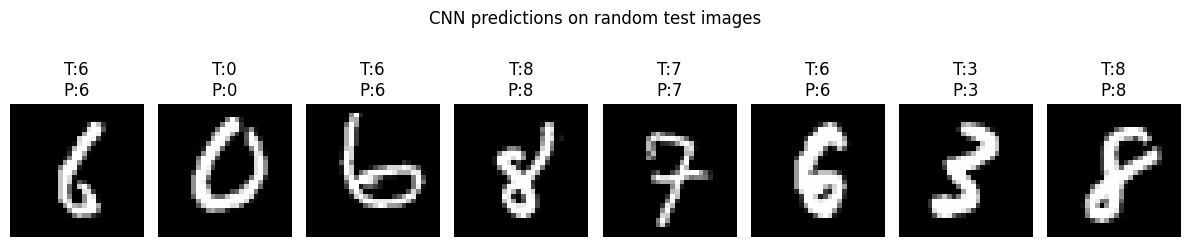

In [ ]:
# Select a few random test images
num_examples = 8
indices = np.random.choice(len(x_test), num_examples, replace=False)

images = x_test[indices]
true_labels = y_test[indices]
pred_probs = model.predict(images)
pred_labels = np.argmax(pred_probs, axis=1)

# Plot
plt.figure(figsize=(12, 3))
for i in range(num_examples):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.axis("off")
    plt.title(f"T:{true_labels[i]}\nP:{pred_labels[i]}")
plt.suptitle("CNN predictions on random test images")
plt.tight_layout()
plt.show()


## Prompt Engineering Essentials

Prompt Engineering is about communicating clearly with language models so that they
can produce useful, safe, and reliable responses.

From the *Prompt Engineering for Developers* course, two core principles stand out:

1. **Be clear and specific.**
2. **Give the model time to think.**

In this section, I document practical examples that I can reuse when working
with LLMs in real projects.


### Principle 1 – Be Clear and Specific
A vague prompt:

> *"Explain CNNs."*

A clearer, more specific prompt:

> *"Explain Convolutional Neural Networks (CNNs) to a beginner in 5 short bullet points.
> Focus on: (1) what convolution means, (2) why CNNs are good for images,
> and (3) a simple real-world example."*

Key ideas:
- Define the **audience** (beginner, intermediate, expert).
- Specify the **format** (bullet points, steps, table, etc.).
- Limit the **scope** (focus on 2–3 subtopics).
- Mention **constraints** (short, concise, no code, or with code).


### Principle 2 – Give the Model Time to Think

Instead of asking:

> *"Here is some training and test accuracy numbers. Is my CNN overfitting?"*

A better prompt:

> 1. *"I will give you training and validation accuracy for 3 epochs of a CNN."*
> 2. *"First, rewrite the numbers in a small table."*
> 3. *"Then, step by step, explain what the trends suggest."*
> 4. *"Finally, give a short conclusion: is the model underfitting, overfitting, or reasonable?"*

This structure:
- Encourages the model to **analyze the data step by step**.
- Reduces the chance of a rushed or hallucinated answer.
- Mirrors how a human would reason: organize → analyze → conclude.


In [16]:
good_prompts = {
    "cnn_explanation": (
        "Explain Convolutional Neural Networks (CNNs) to a beginner in 5 bullet points. "
        "Focus on: what convolution is, why CNNs are good for images, and give 1 real-world example. "
        "Keep each bullet point under 20 words."
    ),
    "model_diagnosis": (
        "I will give you training and validation accuracy for 3 epochs of a CNN. "
        "First, rewrite them in a table. Then, step by step, analyze if the model "
        "is underfitting, overfitting, or reasonable. Finally, give one sentence of advice."
    ),
}

bad_prompts = {
    "cnn_explanation": "Tell me everything about CNNs.",
    "model_diagnosis": "Is my model good?",
}

good_prompts, bad_prompts


({'cnn_explanation': 'Explain Convolutional Neural Networks (CNNs) to a beginner in 5 bullet points. Focus on: what convolution is, why CNNs are good for images, and give 1 real-world example. Keep each bullet point under 20 words.',
  'model_diagnosis': 'I will give you training and validation accuracy for 3 epochs of a CNN. First, rewrite them in a table. Then, step by step, analyze if the model is underfitting, overfitting, or reasonable. Finally, give one sentence of advice.'},
 {'cnn_explanation': 'Tell me everything about CNNs.',
  'model_diagnosis': 'Is my model good?'})